# Rimless Wheel dynamics

In [1]:
using Pkg
Pkg.activate(".")
Pkg.instantiate()

  Activating project at `~/syndr/Wouter/Onderzoek/Projecten/tue/compasswalker/actinf-compasswalker`


In [2]:
using Base64
using LinearAlgebra
using Distributions
using CairoMakie

In [3]:
# Frames per second
fps = 60

60

In [4]:
function display_mp4(filename)
    display("text/html", string("""<video autoplay controls><source src="data:video/x-m4v;base64,""",
    base64encode(open(read,filename)),"""" type="video/mp4"></video>"""))
end

display_mp4 (generic function with 1 method)

## System

![](figures/rimlessWheel.svg)

In [5]:
m = 1.0
ℓ = 0.2
γ = 0.5 # 0 < γ < 2π
α = π/6
const g = 9.81

9.81

## Start from stance

In [6]:
function animwheel(θt::Vector{Float64}, contact::Vector{Float64})

    f = Figure(resolution=(800,700))
    ax = Axis(f[1, 1])

    # Angle
    θk = Observable(0.0)

    # Slope
    poly!(ax, Point2f[(0, 0), (1, 0), (0, tan(γ))])
    CairoMakie.ylims!(ax, [0.,1.])

    # Standing spoke
    xk = @lift([contact[1], contact[1] + ℓ*sin($θk)])
    yk = @lift([contact[2], contact[2] + ℓ*cos($θk)])
    lines!(xk, yk, linewidth=5, color=:black)

    # Center hub
    centerx = @lift([contact[1]+ℓ/2*sin($θk)])
    centery = @lift([contact[2]+ℓ/2*cos($θk)])
    CairoMakie.scatter!(centerx, centery, marker=:circle, markersize=20, color=:black)

    # All spokes
    for n in 0:5
        xk = @lift([contact[1]+ℓ/2*sin($θk), contact[1]+ℓ/2*sin($θk)+ℓ/2*sin($θk+n*2α)])
        yk = @lift([contact[2]+ℓ/2*cos($θk), contact[2]+ℓ/2*cos($θk)+ℓ/2*cos($θk+n*2α)])
        lines!(xk, yk, linewidth=5, color=:black)
    end

    # Write animation
    record(f, "rimless-wheel.mp4", θt; framerate = 30) do θ
        θk[] = θ
    end
end

animwheel (generic function with 1 method)

In [7]:
Δt = 0.001
time = range(0, stop=1.0, step=Δt)
T = length(time)

1001

In [8]:
function eom(z,t)
    return [z[1] + Δt*z[2]; z[2] + Δt*(g/ℓ*sin(z[1]))]
end

eom (generic function with 1 method)

In [9]:
# Preallocate
z_ = zeros(2,T)

# Initial condition
z_0 = [0.0, 1.0]
z_kmin1 = z_0

for (n,t) in enumerate(time)
    
    # Forward simulation
    z_[:,n] = eom(z_kmin1, t)
    z_kmin1 = z_[:,n]
    
end

animwheel(z_[1,:], [0, tan(γ)])

"rimless-wheel.mp4"

In [10]:
display_mp4("rimless-wheel.mp4")

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAEiDxtZGF0AAACoQYF//+d3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MyAtIEguMjY0L01QRUctNCBBVkMgY29kZWMgLSBDb3B5bGVmdCAyMDAzLTIwMjEgLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwgLSBvcHRpb25zOiBjYWJhYz0xIHJlZj01IGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMgbWU9aGV4IHN1Ym1lPTggcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5nZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTIgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEgZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz0xOCBsb29rYWhlYWRfdGhyZWFkcz0zIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFjZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJhbWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0zIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdlaWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xvb2thaGVhZD01MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIwLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAABh2ZYiEADf//veBvzLLXx576uAt6KuEAti0w3Gz3Rq4DVs66B4H0KbCYMxXoBU/YYQI7bQsq5E8NlkGHdq3m8sIyPsCWxFVN03xbG1kh3bRRklrS2QKNmKPVmQBP4elmNcZAcUOTB2CaCkbiR+CBpw+v0IQrkWboC0ilBPceDrcc7mFrx9JK4WZ5FtzhsSPAgAAAwAAAwAAAwADn7+ChhUuFVxn4xA3FmNGOqhqr+fmCeH47cDEpwIYaSJI7Ws7b5HXKxvsCYvCbA/2+h7dx1UqO6wZVMVy108BX2aWsNo4LoeX31f50gNIN3IMwTbxoiSVNBXw8oZXLmaK/XLYJB6zob+eiorGDBMvr3OPUkkseBRJLWtMHY0Yu4DQJBgKSmj+0H6+H6Q4kJcpWxMNIncUWe+VvqW3SMCxuf/Bh728elksxQNdkwBRXDhKE7mcOoVZt+00pdmzIcXaXzDBeOicwkQY6HTTrjOID/gVp4aX8JGYnpZkkOzCQB82AgAC6V64TcO/CFi8AGkZwMX9gYAB6AOAKCdGWW1O8ou53pp7y0SZ7STKx2AlWVwuu4Wj7fsqJIxGAyM72fEwYm9VigqMdAFOcey5RkM22fJJxNqmB2zWRtz1Vm5+BuNQ1ZdhygnQaS+ptF/ska9Z4IZWJehlzixnBbj64x4RcLot8LVdqr/wV9i78E8cIDKsIWPlSY0B1ecZsB60R2xZUW2nRB1hC65Lw5L3H81pg/Wqf85+ywlHMAvAqxSivbONers7xmecd5jleHLM9hdMH21b4bCHgUJbgAj04KG4OEmEnCsIR63MrA7j59VgtM5NgUmDYS7OiAfn5Iluz9gucrUV42KXka8XCgmK1tJb4ZOafhM21wNiKb1ESKa/KXiR1MjDQKRmGnEsFuhOHzMQU9CUDZ2VL71T1kRi6uWdp3QUnbvSOkDLebavVnM5XKGrXyyXuudjziMQgmkQCe+fKD5/UZXU+Xy9tGSVP5G4jYI/S48kxP8/GFloCFHUEqwyAAA1C04kurVMZVyjYUCJp+wp8g+PbPQMNqLYrPwb3XZdBuMh2f1jz7YVOHwK/dqddDgQcfbX6wI7ito1kCOTd+squMAyvQEcj4HfyJZI174D7OEtq8TsWVKrxU3vYAiWiwoT/+72efpKAMlC7l+saEYoNmmsE3NVHYopme+1/TNhFd6Su0JnXWOXD4YnGMI9VBHzlWLvOxqu2O1kQFJYb5p1lP5aFavSwOwFgDVf1Rx/mcph3ouZ88qU027aTi5eGxqwf/gWvazJoT9c8AzxB8xVsvL4JLCK3XwL4PJO/HQ6/kC7+jvJoBC2VRCVLV1mmFi+NYA66t3tbfQcpn/8wv6IP+AzWZhcNXDnMMlDQ23Nv34IJxFHFPfWpqtMmtOeVt2weks0jNBxzbHZKVFPU1E+RZUgYWsfXXrGtuZ0/sWpAAADAABe60ILNzQ7/kRCbaI4FXUjSnlLoIXaEjTMS932VBhDyyYKJLXeWyPlWwMQvF38RzVgoRR5bDDtl4kT2W0agLXU7TCkmlx0jhc2wYTevLm8xs9Lrgf/tAd6o6q5H19W5I8WsYCemsWU/0812lLTK1MSjUhEnsQYreccs35YbtcU8gL/Wq+kGL0R2h3qyYoAovaAtIjQZEKTOtylR+70ysLH3ek/pS0nM2sPgPndJkIGeU8PxY2WUZYXuh2/0JBu/Q4OXB6rTSYMzuVMCpmvzf2/f3WkWU8ZnVngEpFizl6qXgb3aENdgQHgXuhMvExF31O/BIgYXFr4prsJoABXXj7m/aLXKq4lbHKC84UM7nwMgN5pijzcAcX2D9RoQiMh1fjBi+1cjn7ZTS2IX5c3DYsX05nU7rlv5t5c77FQ6XHkF3sEUZzRJ0GFadxv4kKoJHyrbAolqWfGQUPvjiBaWKdnPbr7uNMZasupp1hZpv/qHD2z/RftwmFppkm1DRP/fiLNh/7RvZM/ZycolnhBmatpMxF1U1KUgDmwnq/UGJKK4Ji0lBiutsMw+hZlrLZsdwUbdV5EoTZq7t9dMeLUd67R3X+mSAU7MZhmF/OOHjy5RW7lz3tG1HGAdv7Kb71bmG2hfXJRKvPP3cm7aWi4CmU9ym4uJ1Y9UJRS5PtUXpypllCnetVEj7+2MHH0Dlrg8KwnSlb+nm7ZJbIX6+Oj+3LEBEeqWK1AlCw0F5VS+OHfrMywU4MSKj0V09hphcX72YORH1ysAAMvj4i4kw9R/ThLIPrE8UbfCNdktsa+q+puqoFcxfsN0nfCcbyYQCBMZQzeLPvCEb23DhA8jKAmhsceM0EVKItZITK4j8YKVwk5hsXq1Ok5r0+GcphcIjf6cTCG6eqzNqh675pFj5JiCIbtEwA5SbgkIeU3/aDXrLyQcRNvRNTW+ID4FzHjx6VAjmID9jLmnZVLA2sTg4QZT9810OTnpcf1BiuF+IjHVfuffVnirIKVVwVZyYmzXQ5+WqOSy6rTCb+6bhYUu4uuxY00kE2eCNseEGNOc0UK+EZCv/hAMRylLN7/YnGVfwOqJ9x8NgART2ssS8ZZNj1ZLzeAKmTYFzfmmhlGTG/qw+dHUQWd/HX0yHWs34uAptLQAAQAhkBLBN9IIuzwxzR+99UYcHw96LzdkrfeYmlmGgTqdbyk8O7mohfnD8Vk10xmf9vRD2GGhg7hNTSTYgxz2gnAjBLWbF0NOL9HGbxdD3FW7k3mB2UUFyMUXb7cCL8UEYUp88zfJCBUmOfmMq8qP55+cmtEMUMBH0HiBq/s63DilNgAUJocb+BVX9QXDzL3q64gKYg4DKl6+/92UOnQD90j0OStuY1JoudL4uhpTgMY4acGYhPsH2bxy/+xSf8cKcOxCLhPKK7fxvyYLiWmPUWK6/r1EyfAgqUAU4juqYeVjsRkC5p8p+v8oLX26RqFa6mo4FpiTIJPjvsTenpN0SiSwtAAVTRIAIR4MYeAiUo+1lRaAY/MFQHub7jsxfV9vD4SUTE

## Foot collision

A collision occurs when $\theta = \gamma \pm \alpha$.

In [11]:
function collision_detection(θ; α=0.0, γ=0.0)
    return θ > γ+α
end

collision_detection (generic function with 1 method)

Geometry of contact point. Base of rimless wheel triangle is $2 \ell \sin(\alpha)$. Original length of incline is $\cos(\gamma) l = 1 \implies l = \cos(\gamma)^{-1})$. Minus base of rimless wheel is $l_{new} = \cos(\gamma)^{-1}) - 2 l \sin(2\alpha)$. New x-coordinate of contact point = $l_{new} \cos(\gamma)$ and new y-coordinate of contact point = $l_{new} \sin(\gamma)$.

In [12]:
function upcontact!(contact; α=0.0, γ=0.0)
    contact .= [contact[1]+ℓ*sin(α), contact[2]-ℓ*sin(α)*tan(γ)]
end

upcontact! (generic function with 1 method)

In [13]:
f = Figure(resolution=(800,700))
ax = Axis(f[1, 1])

# Angle
θk = Observable(0.0)
cx = Observable(0.0)
cy = Observable(tan(γ))

# Slope
poly!(ax, Point2f[(0, 0), (1, 0), (0, tan(γ))])
CairoMakie.ylims!(ax, [0.,1.])

# Standing spoke
xk = @lift([$cx, $cx + ℓ*sin($θk)])
yk = @lift([$cy, $cy + ℓ*cos($θk)])
lines!(xk, yk, linewidth=5, color=:black)

# Center hub
centerx = @lift([$cx+ℓ/2*sin($θk)])
centery = @lift([$cy+ℓ/2*cos($θk)])
CairoMakie.scatter!(centerx, centery, marker=:circle, markersize=20, color=:black)

# All spokes
for n in [1,2,4,5]
    xk = @lift([$cx+ℓ/2*sin($θk), $cx+ℓ/2*sin($θk)+ℓ/2*sin($θk+n*2α)])
    yk = @lift([$cy+ℓ/2*cos($θk), $cy+ℓ/2*cos($θk)+ℓ/2*cos($θk+n*2α)])
    lines!(xk, yk, linewidth=5, color=:black)
end

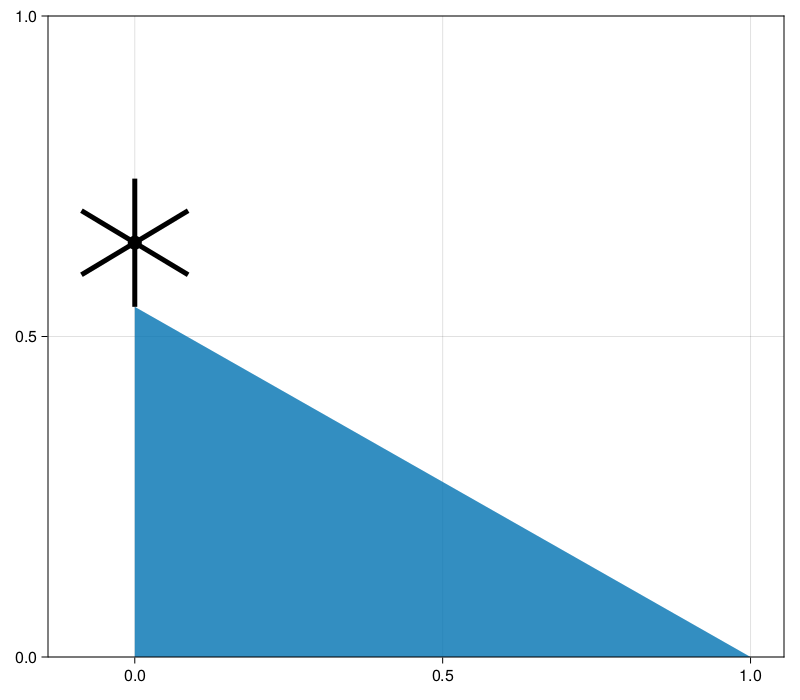

In [14]:
f

In [15]:
# Preallocate
z_ = zeros(2,T)
contact = [0,tan(γ)]

# Initial condition
z_0 = [0.0, 6.0]
z_[:,1] = z_0

record(f, "rimless-wheel+collision.mp4", 2:T; framerate=fps) do k
    
    # Forward simulation
    z_[:,k] = eom(z_[:,k-1], time[k])
    
    θk[] = z_[1,k]

    # Collision detection
    if collision_detection(z_[1,k], α=α, γ=γ)
        
        # Adjust contact point
        upcontact!(contact, α=α, γ=γ)
        cx[] = contact[1]
        cy[] = contact[2]
        
        # Process shock (velocity lost)
        z_[1,k] -= 2α
        z_[2,k] *= cos(2α)
    end       
    sleep(2/fps)
end

"rimless-wheel+collision.mp4"

In [16]:
display_mp4("rimless-wheel+collision.mp4")

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQADzodtZGF0AAACoQYF//+d3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MyAtIEguMjY0L01QRUctNCBBVkMgY29kZWMgLSBDb3B5bGVmdCAyMDAzLTIwMjEgLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwgLSBvcHRpb25zOiBjYWJhYz0xIHJlZj01IGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMgbWU9aGV4IHN1Ym1lPTggcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5nZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTIgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEgZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz0xOCBsb29rYWhlYWRfdGhyZWFkcz0zIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFjZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJhbWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0zIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdlaWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xvb2thaGVhZD01MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIwLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAABXVZYiEAC///vdOvwKbRYV/64ClLugACIllGpcdmrDn+b3Jw4ok614KgutFjkvolBXoLIkh8pyRZquYa0bT8XPmUJBeKjBUq5tul4aEgnLK4AZxUff3rRX5LQHUFt2dtuXxM+i6NK/VHDA23+5gMpSLCmZuHugKjfFeVccrkxqJJoYxhSKshYwFqwAAAwAAAwAAAwAAC3iH/gYbRwpgSGuqzKIobo3Y9/nt6D/SudBE6Q47Ykfy9Gcfabp35Yk01ze7wLHkhdrSS4tAoJs58rGmYWtw9EECPSrwbNl9QIPsiZpxxW/NfHGsS5Tv90hdDUZ3hhPg6j2V8CKg2XcXbORl94Fs7jiZHff6cUguBl4AFtTwnBu+QqwwAgNEt1U4e7Fb7ap12sF5m1GpzR5TGVrFzlrd3VtnD+KPvR3wdUAbGWOGEYBAFm6pwSz0vQaFHDcj0VanvVlGAp/miFWE/goAQsq/8LhXbYhlj8nwxo7AzA+hP/g6oPFB4NeRA4ArExCV2huG2qmAExoAZIAQ+AAAAwAAAwAAAwAAAwAAZNcZjqFuMc4zebcIFtlc6aA6Gu6p+BoWdlXVI09/zjwAEQLb2+k994U+YyHcHrgO6pMw5IAA8cIBNXye0GtdNdlTFxCS/xrf8XQtKvYbeCQ3SCs63IDnvXaizOU2kSQqM2LjFSG4e2mSw4iXfz1c7EHEsyrA4vfTMWhFaspXP+hpvlhOfeqNCTStCpRciN9W+9jgGkWXSFoAimoUPE2QPEVIuKERtOnhkgqx9SLASlCFLDg3igKrGLWcJjiz1tgwlpWroE83L6me7i98QCWkLfIKiNROq+wCxL6vxNzfXtnOomACfgaEbDbJHOOgAtQbJ2QpWpucCFxhUk0VUwLTZNByNCdyxFdUj8Wo1gpeBUVL7hBZ6n7FPb5niil/zipDsatHgiUZUyl34/JctrMz8WEgp1Jm+h18Wv/qAAADAAUwqM9X2Ecgw4fB/k1qVPKrDiaZ88oeM0b8F4IW+9O4xY7FIHL20CSg8G4VkJQskcfb46+LK/3k10rMEahONHNnoJvQ1ltPpUfmhpV8FGacfO56/q4JOt/8XdpdRYgjo5zB70EkqCAjWdHyNf3/+Cnfqrup7pVy/720EztJrfaBB36ox5ImLiJJuoANm0ZgJftzWDaArkxefeIzjA1Ax3q2iw/sONsRdtstU5UR5SdIoa+VxKQ5A8L4C1Nt68+PB8SvAxfhLDZwtYl6a7kaj2oRczmVD4RyTjvUi1ZOO5LGgVFTu683dS5ZVy7Tam+aqP87wVqNte6PTwhkhJLsahFc7lavePiYozLFYFRPW8NwE1tmR+ZK0yt1w/1Cl5HcGKs5OMAtTdAnqW8Fo42AKw20xyD3vp9YFQOdhR67XQhnBW6ph78HD9gZlmo59lPQhgGgzXpywxUyuZ1kcS5SEwCNs/LdbZ3AsXp+t1L9h+2d08xZrORNXtwDbUg+ocuxyiXbUoUJJhURbse2Guv8DhqGPR8HHKGcO7FA6DFIZ6TFomknRB5zKiG74lBlCY0wtmFpMwlwnSVJJPEJ9mKE9NdVlxK3U8z5c43Krl7biIUMuZmv4gCRtIGoptoIMJvh4pU+P4dM8Li3nGQGE0UF1CsFcLFWBHcB2pc60BPktj54YBr+GJGo8E4Plp5W7XzQINziwe2B6k/xfz1owvxoGlyyb2ep89d3YsaRgFlHHUNb9ICfxPK2xWwG336IVRRRT6/6n1fWmYcvbR95wKeDZ4ppy/Ieb+tdnCmsAASkSlD5k9RQISA4F+ADLUSmeB7jdoNNhLqG7Ie6CGOkDxfxg+Mwj7S86jlVBDsztJvyZqy6NDpBH98Is92BSSgd3A/pzOzSOD3qp0ksjg43jNTr0LsVJ1vexm/Lsd/Ynu6ocNtttLXg40bbkONTvINHe7QSBx34iQGkZW811NghD4X/TtEmBTRtNqdHarQ32KQYsYaYlTTA1ZZMNpyzCW35Ldkn2NDZcV7pvuVkiC8vG1jIY2DrSd5Hg004Lt3SdTNFICHbpIsIg/FEYzwAAHlkaHAfbTe7TnN+2A4LBXrIl1tjOecHoVNiG+Epgepk/Lu65NnEiXLHinFP7io+0oPBjDWzrPOgJVit6MNy8sKK7o4dy68PtdZ9Ax0yOdUPKdFHu9ZVy3ZF1BPKFGIhuXvCdGBS8jCZIJstwfDsyxsY//kYg3L1yxwQ4H7+DDx/rqMKr2n9+dLwKyuDeXwlmpT4/vrjwff3vh8qt0EP8fMKRZux7WSi0rXJNme1YhsXNHq0afx034GicrdZAPigTBqPyXZr+8r2Iqz3L64qFC23OHqDdXOE429vfu5OWzyhClhYSePGW4ufq6awd9yC9v8cxmwlAHiyPb3XOuaP00Q2UWWdFmQRjDkLql7gJ3jPGMjZEhBRpJu3MNEy2EpxrNyDs1eVbEt3A0nosiTF4Eb7BelcNSU5l8jnI1NzqMMf+gf2WANz8hNfeAvhaQXMD+IptwP+GKW9KIwSydnGun1ZKwTM+4G4R84vkVJEOSWyp9xhg5w4zwqf1YBQfLzz+0wcZlekzyFZx/+00yoLCpffYMW1FbZAl7rPqANtIhNBsz24dU0SlsvqJUwwXwuUVqXE+XMqk/Xg2kkLpYrIZwgXs0OVTXazX1eMfOvss/jc31MhReH2FPQXBpwPA5kQCudrCBPhmfS0Qny+2fGRt8lEnkBMmNcIKBdQaQA8tNH5thuHMxigaOgEOhcyGMcsisr0JU9kBcRR6VDCyLMA2vnUJdzmAIxCpwYexxPxMxclLbyR/s4H3nqjSGwAAv9EpJvYr/3fHj+63ft2MmCCmPJJ7Un7sez+GRxC/E0kih5TbfAtQHSVTJG97L+K3faoVqoj13H/j5cUgQa/uLCVsHhDvb2hRuIB2tpejNJse6wm5p/WVXNi7yGJ5JD1gTpZJzc2vg+qEvBC3P3StKTvo6xScfhWk/RNFmlOKE7U0kV